In [1]:
from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

## Nitrogen Gas $N_2$

In [3]:
npoints1 = 100

In [4]:
def get_temperature(data_points):
    ''' Defines temperature data points
    '''
    Temperature = numpy.zeros((data_points),dtype=float)
    Temperature[0] = 300.
    #
    for i in range(1,data_points):
        Temperature[i] = Temperature[i-1]+100.
    #
    return Temperature

In [5]:
TN2 = get_temperature(npoints1)

In [6]:
TN2


array([   300.,    400.,    500.,    600.,    700.,    800.,    900.,
         1000.,   1100.,   1200.,   1300.,   1400.,   1500.,   1600.,
         1700.,   1800.,   1900.,   2000.,   2100.,   2200.,   2300.,
         2400.,   2500.,   2600.,   2700.,   2800.,   2900.,   3000.,
         3100.,   3200.,   3300.,   3400.,   3500.,   3600.,   3700.,
         3800.,   3900.,   4000.,   4100.,   4200.,   4300.,   4400.,
         4500.,   4600.,   4700.,   4800.,   4900.,   5000.,   5100.,
         5200.,   5300.,   5400.,   5500.,   5600.,   5700.,   5800.,
         5900.,   6000.,   6100.,   6200.,   6300.,   6400.,   6500.,
         6600.,   6700.,   6800.,   6900.,   7000.,   7100.,   7200.,
         7300.,   7400.,   7500.,   7600.,   7700.,   7800.,   7900.,
         8000.,   8100.,   8200.,   8300.,   8400.,   8500.,   8600.,
         8700.,   8800.,   8900.,   9000.,   9100.,   9200.,   9300.,
         9400.,   9500.,   9600.,   9700.,   9800.,   9900.,  10000.,
        10100.,  102

In [7]:
def get_N2_cp(temperature):
    ''' Defines specific heat from heat capacity formula
    
    Ref: Thermodynamic Properties of 65 elements: their oxides, halides,carbides,
    and nitrides. Wicks CE; Block FE 
    '''
    Tx = temperature.copy()
    cp_g1 = numpy.zeros_like(temperature)
    cp_out = numpy.zeros_like(temperature)
    #
    array_size = numpy.size(temperature)
    #specific heat of nitrogen gas
    for i in range(array_size):
        cp_g1[i] = 6.66 + 1.02*(1e-3)*Tx[i] # {cal}/{gram-mole K}
    #conversion:
    mw_N2 = 2*14.0067*(1e-3) # molar mass in kg
    cp_out[:] = cp_g1[:] * (4.184)/mw_N2
    #
    return cp_out[:]

In [8]:
cp_N2 = get_N2_cp(TN2)

## Nickel

In [9]:
def get_Ni_cp(temperature):
    ''' Specific heat of Nickel
    '''
    Tx = temperature.copy()
    cp_s2 = numpy.zeros_like(temperature)
    cp_out = numpy.zeros_like(temperature)
    array_size = numpy.size(temperature)
    # specific heat of nickel
    for i in range(array_size):
        if ( Tx[i] < 633.0):
            cp_s2[i] = 4.06 + 7.04*(1e-3)*Tx[i]
        elif (Tx[i] >= 633. and Tx[i] < 1725.):
        #elif (633. <= Tx[i] < 1725.) :
            cp_s2[i] = 6.0 + 1.8*(1e-3)*Tx[i]
        elif (Tx[i] >=1725):
            cp_s2[i] = 9.20
    #conversion
    mw_Ni = 58.6934*1e-3
    cp_out[:] = cp_s2[:] * (4.184)/mw_Ni
    #
    return cp_out

In [10]:
cp_Ni = get_Ni_cp(TN2)

In [11]:
cp_Ni

array([ 439.97532942,  490.16046097,  540.34559252,  590.53072407,
        517.53416909,  530.36559477,  543.19702045,  556.02844613,
        568.85987181,  581.69129749,  594.52272317,  607.35414885,
        620.18557453,  633.01700021,  645.84842589,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842364,
        655.82842364,  655.82842364,  655.82842364,  655.82842

## Boron

In [12]:
def get_B_cp(temperature):
    ''' specific heat of Boron
    '''
    Tx = temperature.copy()
    cp_s1 = numpy.zeros_like(temperature)
    cp_out = numpy.zeros_like(temperature)
    array_size = numpy.size(temperature)
    # specific heat of boron
    for i in range(array_size):
        if (Tx[i] < 1200.):
            cp_s1[i] = 1.54 + 4.49*(1e-3)*Tx[i]
        else:
            cp_s1[i] = 1.54 + 4.49*(1e-3)*1200.
    #conversion
    mw_B = 10.811*1e-3
    cp_out[:] = cp_s1[:] * 4.814/mw_B
    #
    return cp_out

In [13]:
cp_B = get_B_cp(TN2)

In [14]:
cp_B

array([ 1285.54416798,  1485.47812413,  1685.41208029,  1885.34603644,
        2085.2799926 ,  2285.21394876,  2485.14790491,  2685.08186107,
        2885.01581722,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
        3084.94977338,  3084.94977338,  3084.94977338,  3084.94977338,
      

## Cobalt

In [15]:
def get_Co_cp(temperature):
    ''' specific heat of Boron
    '''
    Tx = temperature.copy()
    cp_s3 = numpy.zeros_like(temperature)
    cp_out = numpy.zeros_like(temperature)
    array_size = numpy.size(temperature)
    # specific heat of cobalt
    for i in range (array_size):
        if (Tx[i] < 718.):
            cp_s3[i] = 4.72 + 4.3*(1e-3)*Tx[i]
        elif ( Tx[i] >= 718. and  Tx[i] < 1400.):
            cp_s3[i] = 3.30 + 5.86*(1e-3)*Tx[i]
        elif (Tx[i] >= 1400.):
            cp_s3[i] = 9.60
    #conversion:
    mw_Co = 58.933195*1e-3
    cp_out[:] = cp_s3[:] * 4.184/mw_Co
    #
    return cp_out
        

In [16]:
cp_Co = get_Co_cp(TN2)

In [17]:
cp_Co

array([ 426.68380698,  457.21193294,  487.74005889,  518.26818485,
        548.79631081,  567.11318638,  608.71663245,  650.32007852,
        691.92352459,  733.52697067,  775.13041674,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.5581609 ,
        681.5581609 ,  681.5581609 ,  681.5581609 ,  681.55816

## Plots

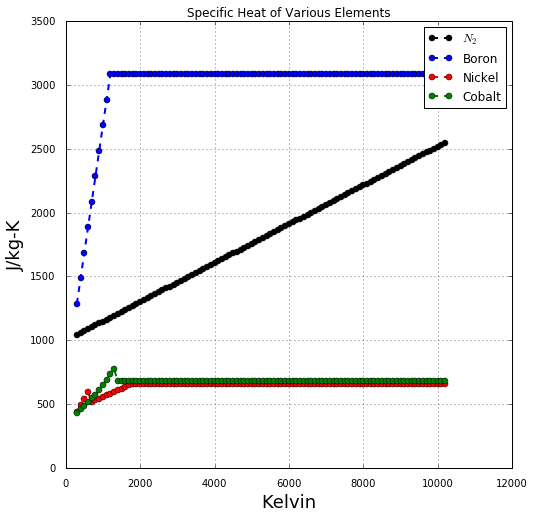

In [18]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('J/kg-K', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
#pyplot.xticks(numpy.arange(1200, 3000, 200))
#
pyplot.title('Specific Heat of Various Elements')
#
pyplot.plot(TN2,cp_N2,color='k', ls='--', lw=2, marker='o')
pyplot.plot(TN2,cp_B,color='b',ls='--', lw=2, marker='o')
pyplot.plot(TN2,cp_Ni,color='r',ls='--', lw=2, marker='o')
pyplot.plot(TN2,cp_Co,color='g',ls='--', lw=2, marker='o')
pyplot.legend(['$N_2$','Boron','Nickel','Cobalt'], loc='upper right');